 Predicción de Series Temporales
 Modelos de Intervención y Outliers

In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r",encoding="utf-8").read()
    return HTML(styles)
css_styling()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importamos la libreria de gráficos Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

 Tipos de modelos de intervención
 Simulacion
 Impulso

 Crear una data frame temporal

In [5]:
#
date_rng = pd.date_range(start='2015/07/01', end='2021/11/15', freq='m')
ts_imp = pd.DataFrame(date_rng, columns=['date']).set_index('date')
ts_imp['data'] = np.zeros(len(date_rng))
ts_imp.head(5)

,data
date,
2015-07-31,0.0
2015-08-31,0.0
2015-09-30,0.0
2015-10-31,0.0
2015-11-30,0.0


In [6]:
ts_imp.loc["2020"]

,data
date,
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,0.0
2020-04-30,0.0
2020-05-31,0.0
2020-06-30,0.0
2020-07-31,0.0
2020-08-31,0.0
2020-09-30,0.0


In [7]:
# Impulso en Marzo

ts_imp.loc["2020-03-31"]=1
ts_imp.loc["2020"]

,data
date,
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,1.0
2020-04-30,0.0
2020-05-31,0.0
2020-06-30,0.0
2020-07-31,0.0
2020-08-31,0.0
2020-09-30,0.0


<AxesSubplot:xlabel='date'>

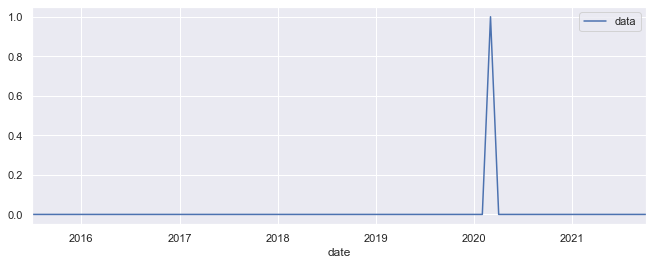

In [8]:
#
ts_imp.plot()

 Tipos de modelos de intervenció
 Simulacion
 Escalon

 Crear una data frame temporal

In [9]:
#
ts_esc = pd.DataFrame(date_rng, columns=['date']).set_index('date')
ts_esc['data'] = np.zeros(len(date_rng))
ts_esc.head(5)

,data
date,
2015-07-31,0.0
2015-08-31,0.0
2015-09-30,0.0
2015-10-31,0.0
2015-11-30,0.0


In [10]:
#
ts_esc.loc["2020"]

,data
date,
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,0.0
2020-04-30,0.0
2020-05-31,0.0
2020-06-30,0.0
2020-07-31,0.0
2020-08-31,0.0
2020-09-30,0.0


In [11]:
#
ts_esc.loc["2020-03-31":]=1
ts_esc.loc["2020":"2021"]

,data
date,
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,1.0
2020-04-30,1.0
2020-05-31,1.0
2020-06-30,1.0
2020-07-31,1.0
2020-08-31,1.0
2020-09-30,1.0


<AxesSubplot:xlabel='date'>

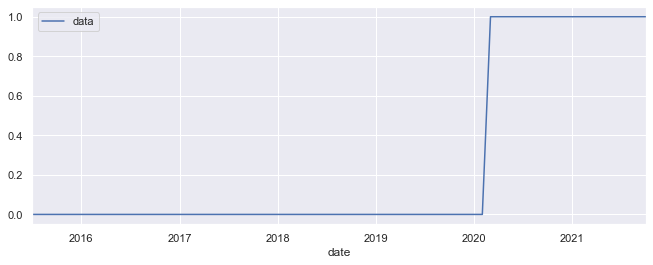

In [12]:
#
ts_esc.plot()

 Tipos de modelos de intervención
 Simulacion
 Rampa

 Crear una data frame temporal

In [13]:
#
import statsmodels.api as sm

<AxesSubplot:xlabel='date'>

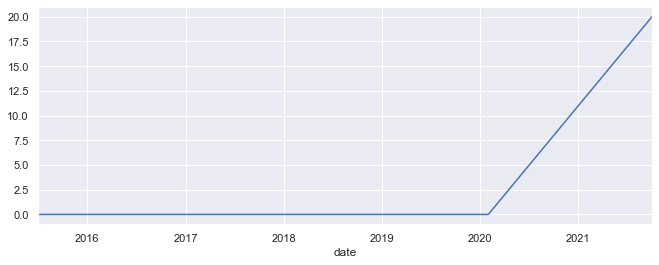

In [14]:
# Rampa con escalon
# delta=1
delta=1
ts_rampa=sm.tsa.filters.recursive_filter(ts_esc, np.r_[delta])
ts_rampa.plot()

<AxesSubplot:xlabel='date'>

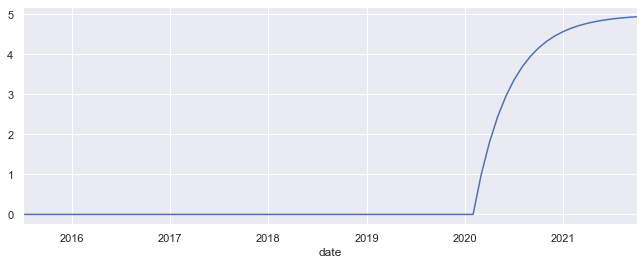

In [15]:
# Rampa con escalon
# delta=0.8
delta=0.8
ts_rampa=sm.tsa.filters.recursive_filter(ts_esc, np.r_[delta])
ts_rampa.plot()

<AxesSubplot:xlabel='date'>

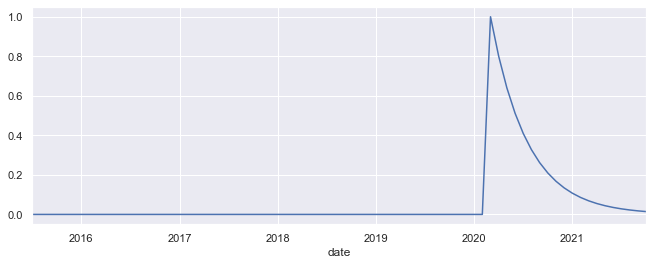

In [16]:
# Rampa con impulso
# delta=0.8
delta=0.8
ts_rampa=sm.tsa.filters.recursive_filter(ts_imp, np.r_[delta])
ts_rampa.plot()

<AxesSubplot:xlabel='date'>

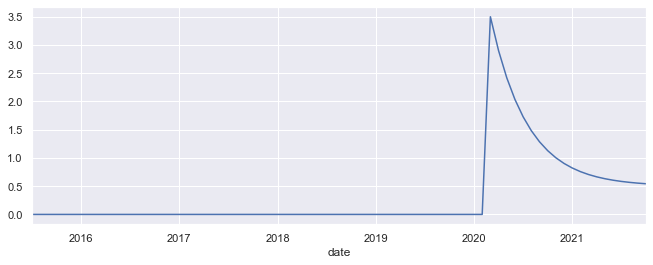

In [17]:
# Rampa con impulso
# delta1=0.8
# delta2=1
# w1=3
# w2=0.5
delta1=0.8
delta2=1
w1=3
w2=0.5
ts_rampa=w1*sm.tsa.filters.recursive_filter(ts_imp, np.r_[delta1])+w2*sm.tsa.filters.recursive_filter(ts_imp, np.r_[delta2])
ts_rampa.plot()

<AxesSubplot:xlabel='date'>

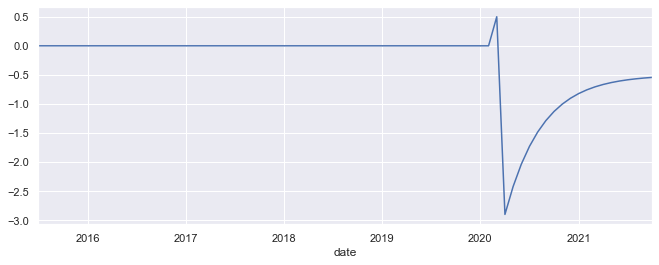

In [18]:
# Rampa con impulso
# delta1=0.8
# delta2=1
# w0=4
# w1=-3
# w2=-0.5
delta1=0.8
delta2=1
w0=4
w1=-3
w2=-0.5
ts_rampa=w0*sm.tsa.filters.recursive_filter(ts_imp, np.r_[0])+w1*sm.tsa.filters.recursive_filter(ts_imp, np.r_[delta1])+w2*sm.tsa.filters.recursive_filter(ts_imp, np.r_[delta2])
ts_rampa.plot()